<a href="https://colab.research.google.com/github/AllanVernon/PythonProject/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 8) (614, 8) (154, 8)
Accuracy score of the training data :  0.7866449511400652
Accuracy score of the test data :  0.7727272727272727
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


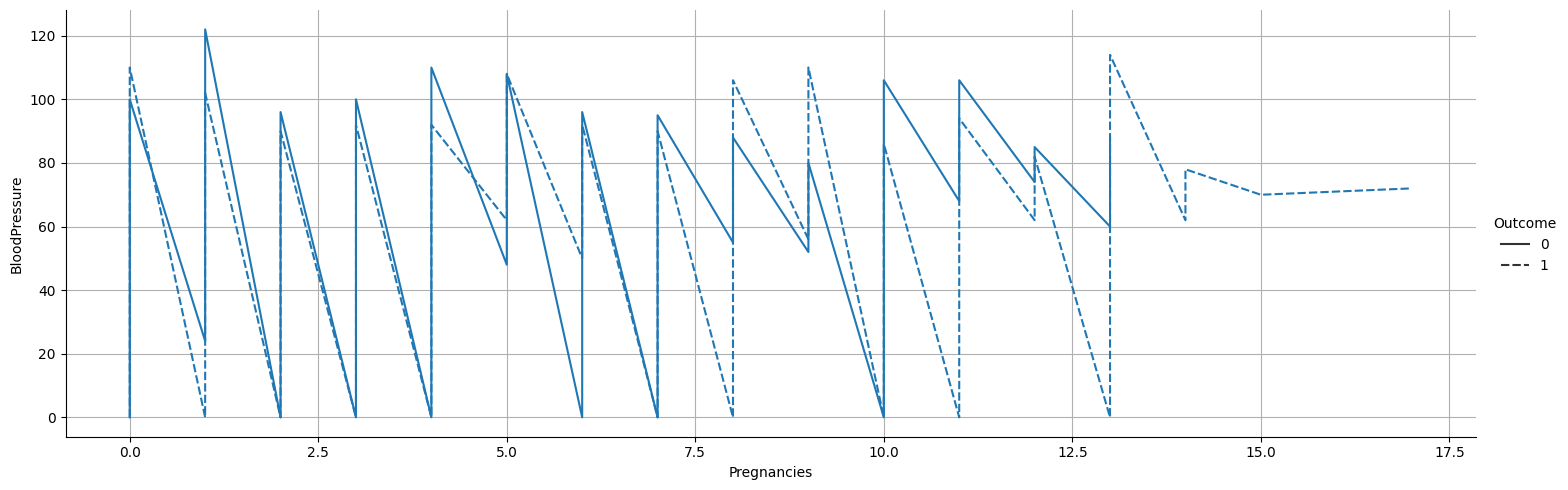

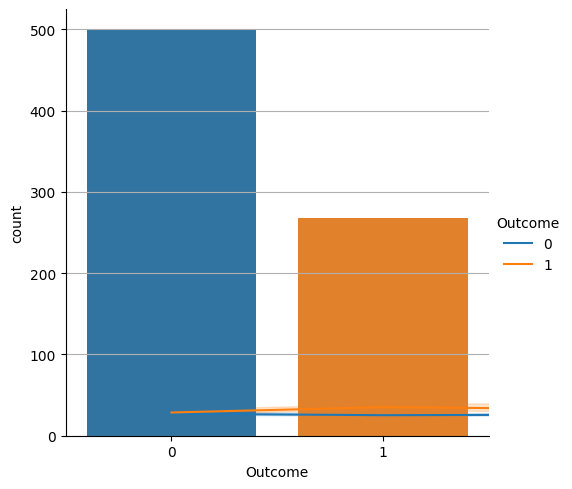

In [ ]:
get_ipython().system('pip install scikit-learn')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

diabetes_dataset = pd.read_csv('diabetes.csv')

diabetes_dataset

diabetes_dataset.shape

diabetes_dataset.describe()

diabetes_dataset.isnull().sum()

diabetes_dataset.info()

# # 0 --> Non-Diabetic 1 --> Diabetic

diabetes_dataset.head(2)

diabetes_dataset.groupby('Outcome').mean()

diabetes_dataset[diabetes_dataset['Outcome']==1].sum()

diabetes_dataset.groupby('Outcome')['Pregnancies'].sum()

sns.relplot(x='Pregnancies',y='BloodPressure',data=diabetes_dataset,kind='line',style='Outcome',height=5,aspect=3,estimator=None)
plt.grid()
diabetes_dataset.head(2)

sns.relplot(x='Pregnancies',y='Age',kind='line',data=diabetes_dataset,hue='Outcome')
plt.grid()

sns.countplot(x='Outcome',data=diabetes_dataset)

# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

X

Y

scaler = StandardScaler()

scaler.fit(X)

standardized_data = scaler.transform(X)

standardized_data

X = standardized_data
Y = diabetes_dataset['Outcome']

# # Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

# # Training the Model

classifier = svm.SVC(kernel='linear')

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# # Model Evaluation Accuracy Score

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

# # Making a Predictive System

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


